<a href="https://colab.research.google.com/github/Hironobu-Kawaguchi/Hello-World/blob/master/tf2keras_mnist_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TensorFlow 2.0 の keras で MNIST

## import
Google Colaboratory ではまだデフォルトのTensorFlowは1.xなので、2.0に変更してインポート（近々デフォルトがアップデートされる予定のようです。）

In [1]:
# TensorFlow 2.0 install
try:
    %tensorflow_version 2.x
except Exception:
    pass

TensorFlow 2.x selected.


In [0]:
import tensorflow as tf

In [3]:
tf.__version__

'2.1.0'

## Data
Google Colaboratory の sample_data に用意されている MNIST(small)を使用します

In [0]:
import numpy as np
import pandas as pd

In [5]:
mnist_train_small = pd.read_csv('sample_data/mnist_train_small.csv', header=None)
mnist_train_small.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
mnist_test = pd.read_csv('sample_data/mnist_test.csv', header=None)
mnist_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
mnist_train_small.shape, mnist_test.shape

((20000, 785), (10000, 785))

In [8]:
y_train = mnist_train_small.iloc[:, 0].to_numpy()
y_train.shape

(20000,)

In [9]:
x_train = mnist_train_small.drop(columns=0).to_numpy().reshape(-1,28,28)
x_train.shape

(20000, 28, 28)

In [10]:
y_test = mnist_test.iloc[:, 0].to_numpy()
y_test.shape

(10000,)

In [11]:
x_test = mnist_test.drop(columns=0).to_numpy().reshape(-1,28,28)
x_test.shape

(10000, 28, 28)

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

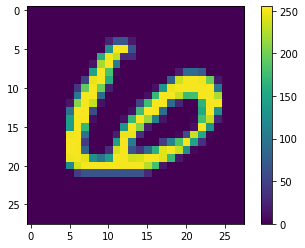

In [13]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

In [0]:
x_train, x_test = x_train / 255.0, x_test / 255.0

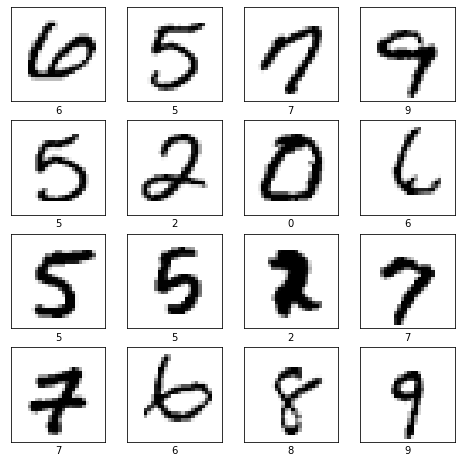

In [15]:
plt.figure(figsize=(8,8))
for i in range(4*4):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

## Dataset

In [0]:
image_label_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train))

In [0]:
image_count = len(y_train)

In [18]:
ds = image_label_ds.cache(filename='./cache.tf-data')
ds = ds.apply(
    tf.data.experimental.shuffle_and_repeat(buffer_size=image_count))

Instructions for updating:
Use `tf.data.Dataset.shuffle(buffer_size, seed)` followed by `tf.data.Dataset.repeat(count)`. Static tf.data optimizations will take care of using the fused implementation.


In [0]:
batch_size = 32
ds = ds.batch(batch_size)

In [0]:
ds_valid = tf.data.Dataset.from_tensor_slices((x_test, y_test))
ds_valid = ds_valid.batch(batch_size)

## Model

In [0]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Flatten(input_shape=(28, 28)),
                                    tf.keras.layers.Dense(128, activation='relu'),
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Dense(10, activation='softmax')
])

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


## Train

In [24]:
history = model.fit(ds, epochs=10, steps_per_epoch=625, workers=0, validation_data=ds_valid)

Train for 625 steps, validate for 313 steps
Epoch 1/10
625/625 [==============================] - 3s 5ms/step - loss: 0.4385 - accuracy: 0.8737 - val_loss: 0.2224 - val_accuracy: 0.9370
Epoch 2/10
625/625 [==============================] - 2s 4ms/step - loss: 0.2197 - accuracy: 0.9366 - val_loss: 0.1707 - val_accuracy: 0.9512
Epoch 3/10
625/625 [==============================] - 2s 4ms/step - loss: 0.1646 - accuracy: 0.9517 - val_loss: 0.1521 - val_accuracy: 0.9566
Epoch 4/10
625/625 [==============================] - 2s 4ms/step - loss: 0.1354 - accuracy: 0.9612 - val_loss: 0.1284 - val_accuracy: 0.9599
Epoch 5/10
625/625 [==============================] - 2s 4ms/step - loss: 0.1089 - accuracy: 0.9676 - val_loss: 0.1299 - val_accuracy: 0.9615
Epoch 6/10
625/625 [==============================] - 2s 4ms/step - loss: 0.0942 - accuracy: 0.9720 - val_loss: 0.1095 - val_accuracy: 0.9668
Epoch 7/10
625/625 [==============================] - 2s 4ms/step - loss: 0.0790 - accuracy: 0.9761 - va

In [25]:
history.history

{'accuracy': [0.8737,
  0.93655,
  0.9517,
  0.9612,
  0.96765,
  0.972,
  0.97615,
  0.98,
  0.98235,
  0.98275],
 'loss': [0.43851985273361205,
  0.21965215274095534,
  0.16456505680382252,
  0.1353602639466524,
  0.10889713589400053,
  0.09421654689237476,
  0.07899076885357499,
  0.06795423924140633,
  0.05804167624674737,
  0.05451862423680723],
 'val_accuracy': [0.937,
  0.9512,
  0.9566,
  0.9599,
  0.9615,
  0.9668,
  0.9668,
  0.9676,
  0.9695,
  0.971],
 'val_loss': [0.22241477082712582,
  0.17066330915932862,
  0.1520959875544908,
  0.12838537473761188,
  0.12993615856018517,
  0.10949443090303887,
  0.11430304612593946,
  0.10366321683577902,
  0.1072536335305717,
  0.1001989278483845]}

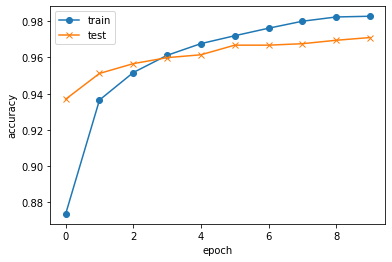

In [26]:
#acc, val_accのプロット
plt.plot(history.history["accuracy"], label="train", ls="-", marker="o")
plt.plot(history.history["val_accuracy"], label="test", ls="-", marker="x")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(loc="best")
plt.show()

## Test

In [27]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=1)

10000/10000 [==============================] - 1s 67us/sample - loss: 0.1004 - accuracy: 0.9710


In [0]:
preds = model.predict(x_test)

In [29]:
preds.shape

(10000, 10)

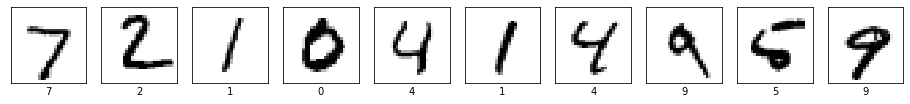

[7 2 1 0 4 1 4 9 5 9]


In [30]:
plt.figure(figsize=(16,16))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.xlabel(y_test[i])
plt.show()
print(np.argmax(model.predict(x_test[0:10]), axis=1))

In [0]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

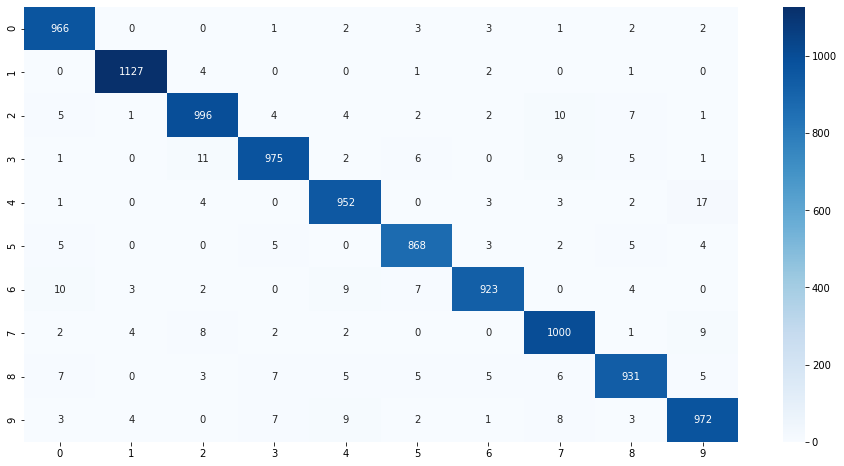

In [32]:
cm = confusion_matrix(y_test,np.argmax(preds,axis=1))
plt.figure(figsize=(16,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.show()